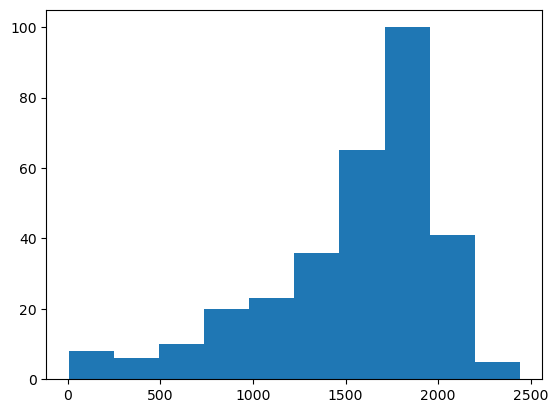

In [43]:
import pandas as pd
import matplotlib as plot
import sqlalchemy as db
import matplotlib.pyplot as plt

engine = db.create_engine("sqlite:///donnees_sncf.db")
connection = engine.connect()

df = pd.read_sql_table(table_name="sncf",con=engine)
df['date'] = pd.to_datetime(df['date']) - pd.to_timedelta(7, unit='d')

df_semaine=pd.DataFrame(df.groupby([pd.Grouper(key='date', freq='W')])["type_objet"].count())

df_semaine.reset_index(inplace=True)
plt.figure()
plt.hist(df_semaine['type_objet'])
plt.show()
